In [5]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

## Excercise 1 - modelling height of !Kung people

In [6]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [ ]:
d['height'].mean()

154.5970926136364

In [ ]:
d['height'].std()

7.742332137351995

### Task 1 Prior predictive checks

In [8]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim = model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [10]:
df = sim.draws_pd()
df

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,175.551,15.7772,155.478
1,0.0,0.0,155.578,13.6106,158.928
2,0.0,0.0,163.868,17.2653,180.630
3,0.0,0.0,158.889,15.5989,158.545
4,0.0,0.0,164.745,14.6579,160.185
...,...,...,...,...,...
995,0.0,0.0,154.380,15.5211,166.558
996,0.0,0.0,151.447,13.8066,155.227
997,0.0,0.0,149.663,14.8988,150.724
998,0.0,0.0,154.661,15.2480,131.383


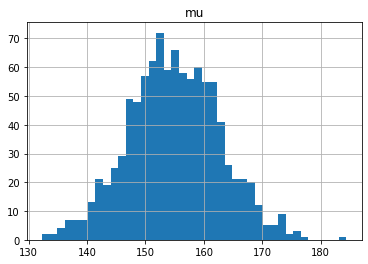

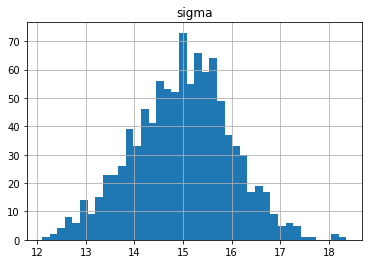

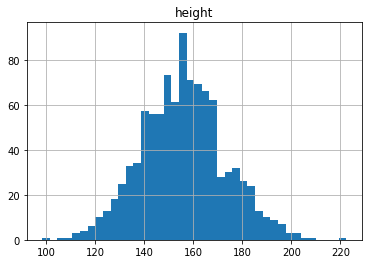

In [11]:
df = sim.draws_pd()
df.hist(column="mu", bins=40)
df.hist(column="sigma", bins=40)
df.hist(column="height", bins=40)
plt.show()

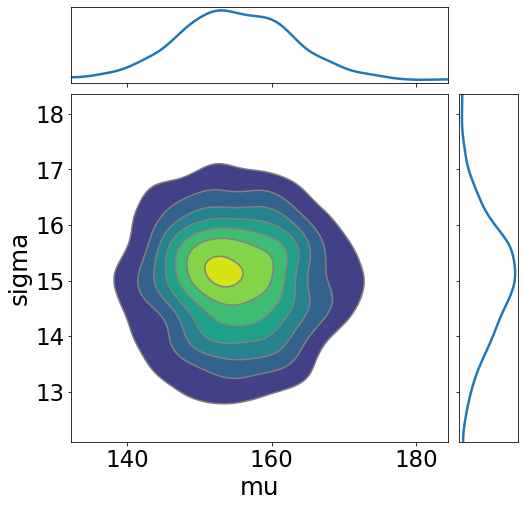

In [12]:
az.plot_pair(
    sim,
    var_names=["mu", "sigma"],
    kind="kde",
    marginals=True,
    figsize=(8, 8),
)
plt.show()

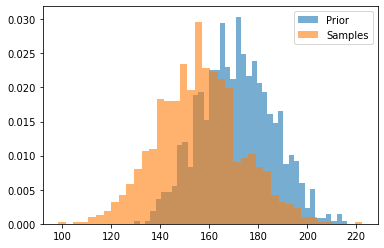

In [13]:
prior = np.random.normal(170, 15, R)
fig, ax = plt.subplots()
ax.hist(prior, bins=40, alpha=0.6, density=True, label='Prior')
ax.hist(df['height'], bins=40, alpha=0.6, density=True, label='Samples')
ax.legend()
plt.show()

In [14]:
df["height"].mean()

155.93722509999998

In [ ]:
df["height"].std()

17.245146112236114

### Task 2. Model fit and evaluation

In [ ]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:compiling stan file /home/lab4/height_1_fit.stan to exe file /home/lab4/height_1_fit
INFO:cmdstanpy:compiled model executable: /home/lab4/height_1_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab4/height_1_fit.hpp /home/lab4/height_1_fit.stan
Warning in '/home/lab4/height_1_fit.stan', line 3, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sund

In [ ]:
fit=model_1_fit.sample(data=dict(N=len(d),
                        heights=d.height.values),
                        seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [ ]:
df = fit.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,heights_pred
0,-921.222,0.814700,1.00309,2.0,3.0,0.0,921.525,154.754,7.93022,145.986
1,-920.094,0.924105,1.00309,1.0,3.0,0.0,921.767,154.431,8.48331,157.427
2,-920.094,0.942273,1.00309,1.0,3.0,0.0,920.475,154.431,8.48331,144.729
3,-920.094,0.760570,1.00309,1.0,3.0,0.0,921.523,154.431,8.48331,152.122
4,-920.226,0.843883,1.00309,2.0,3.0,0.0,921.574,154.823,8.28377,157.546
...,...,...,...,...,...,...,...,...,...,...
3995,-920.233,0.969472,0.92963,2.0,3.0,0.0,921.617,154.307,8.48333,141.392
3996,-920.061,0.912751,0.92963,2.0,3.0,0.0,920.977,154.738,8.40351,153.434
3997,-920.120,0.960766,0.92963,2.0,7.0,0.0,920.354,154.397,8.47564,147.200
3998,-921.506,0.847614,0.92963,2.0,3.0,0.0,921.546,155.348,8.61644,165.826


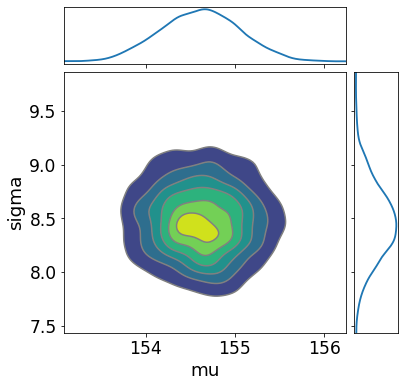

In [ ]:
az.plot_pair(
    fit,
    var_names=["mu", "sigma"],
    kind="kde",
    marginals=True,
    figsize=(6, 6),
)
plt.show()

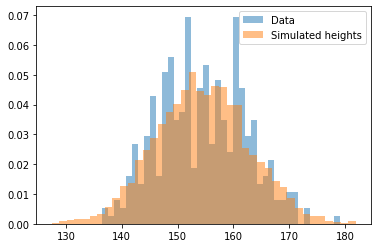

In [ ]:
fig, ax = plt.subplots()
ax.hist(d['height'], bins=40, alpha=0.5, density=True, label='Data')
ax.hist(df['heights_pred'], bins=40, alpha=0.5, density=True, label='Simulated heights')
ax.legend()
plt.show()

In [ ]:
df['heights_pred'].mean()

154.46701449999998

In [ ]:
df['heights_pred'].std()

8.34749090588877

### Task 3. Adding predictor to the model - weight

In [16]:
data_sim = {'N':50, 'weight':np.linspace(d.weight.min(),d.weight.max())}

In [38]:
d['c_weight'] = d['weight'] - d['weight'].mean()

### Task 4. Prior predictive checks

In [33]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/lab4/height_2a_ppc.stan to exe file /home/lab4/height_2a_ppc
INFO:cmdstanpy:compiled model executable: /home/lab4/height_2a_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [34]:
df = sim.draws_pd()
df

,lp__,accept_stat__,alpha,betha,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,174.853,0.777181,11.1832,200.428,183.969,202.766,213.925,226.360,...,232.256,240.8150,237.481,223.6780,205.817,215.762,219.2470,231.3380,226.4940,231.0070
1,0.0,0.0,144.768,-0.006780,14.9889,162.767,155.938,155.636,162.203,162.725,...,184.447,144.0110,130.880,142.0170,130.084,152.086,128.7480,142.8550,163.8970,143.2040
2,0.0,0.0,150.712,-1.138640,11.3344,131.389,112.458,112.033,119.967,116.832,...,105.484,69.8975,101.332,87.2475,104.891,82.066,92.4898,85.5593,79.2764,81.4062
3,0.0,0.0,146.438,-0.254452,13.4763,156.442,129.474,135.264,125.186,134.895,...,139.428,133.8220,136.849,150.7420,125.312,124.613,142.9360,124.2870,136.0420,125.6060
4,0.0,0.0,146.351,1.671020,12.8918,164.620,191.735,190.342,191.561,219.313,...,262.082,259.8030,234.571,247.3820,244.396,241.446,241.4980,259.2060,257.9410,241.1210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,147.745,1.261300,13.1827,199.939,166.717,189.906,189.804,193.223,...,227.666,188.6630,232.933,218.0600,258.202,220.419,224.4680,253.7400,220.8110,213.9040
996,0.0,0.0,161.069,1.223380,17.0354,210.501,210.496,193.565,204.623,179.145,...,222.958,241.3120,241.448,204.1980,249.455,227.681,200.9100,259.4080,231.7440,234.9020
997,0.0,0.0,151.995,-0.272051,6.5999,140.327,151.625,148.444,143.700,144.836,...,132.124,133.4360,140.046,124.0370,136.507,141.023,127.8920,137.1370,129.8090,131.6520
998,0.0,0.0,134.024,0.987160,11.3237,174.815,168.062,163.903,172.904,181.656,...,187.126,188.7580,170.324,182.6910,205.575,191.179,207.3460,182.6820,179.9590,198.6460


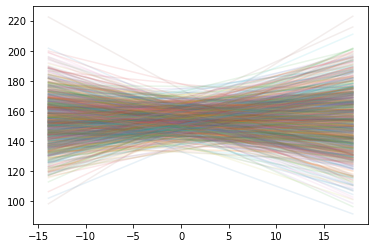

In [52]:
alpha = df['alpha']
beta = df['betha']
height = df['height[1]']

for i in range(len(alpha)):
    x_axis = np.linspace(min(d.c_weight), max(d.c_weight), len(alpha))
    y = alpha[i] + beta[i] * x_axis
    plt.plot(x_axis, y, alpha=0.1)

### Task 5. Modifying prior

In [45]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [ ]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


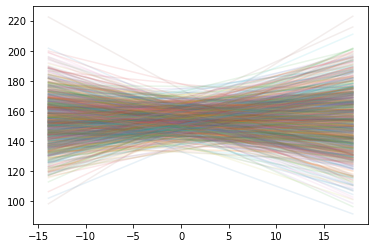

In [47]:
alpha = df['alpha']
beta = df['betha']
height = df['height[1]']

for i in range(len(alpha)):
    x_axis = np.linspace(min(d.c_weight), max(d.c_weight), len(alpha))
    y = alpha[i] + beta[i] * x_axis
    plt.plot(x_axis, y, alpha=0.1)

### Task 6. Fitting and evaluating model

In [67]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:compiling stan file /home/lab4/height_2_fit.stan to exe file /home/lab4/height_2_fit
INFO:cmdstanpy:compiled model executable: /home/lab4/height_2_fit


In [68]:
N = 100
data_fit = {'N': N, 'weights': d.weight.values[:N], 'heights': d.height.values[:N]}

In [69]:
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [70]:
df = fit.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma,betha,...,h[91],h[92],h[93],h[94],h[95],h[96],h[97],h[98],h[99],h[100]
0,-231.939,0.928634,0.137061,5.0,31.0,0.0,232.608,117.223,5.41422,0.815745,...,153.604,155.476,147.033,158.319,152.226,165.489,159.710,163.256,147.992,149.289
1,-231.399,0.999657,0.137061,5.0,31.0,0.0,232.000,119.320,5.82791,0.774944,...,161.422,157.181,151.343,171.170,154.789,161.850,151.329,162.350,160.894,147.689
2,-232.037,0.881785,0.137061,3.0,15.0,0.0,233.020,118.843,6.19877,0.794379,...,159.969,157.675,157.450,160.237,148.885,159.006,146.724,155.077,156.511,152.401
3,-232.854,0.997663,0.137061,5.0,31.0,0.0,233.888,123.889,6.51550,0.682786,...,161.882,160.970,157.233,159.164,156.660,170.199,156.236,157.749,155.418,151.501
4,-232.661,0.999772,0.137061,5.0,31.0,0.0,233.328,124.784,5.92202,0.651354,...,156.754,164.536,159.022,156.845,147.107,159.879,152.332,167.035,162.307,141.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-232.520,1.000000,0.133793,2.0,3.0,0.0,232.732,122.592,5.92209,0.690110,...,159.610,156.624,154.102,154.544,151.816,160.522,150.688,158.274,151.823,146.910
3996,-233.625,0.991614,0.133793,3.0,11.0,0.0,234.324,124.311,5.66212,0.651259,...,164.645,163.302,151.228,157.057,160.279,149.359,154.160,143.801,169.142,147.513
3997,-232.894,0.999455,0.133793,5.0,31.0,0.0,234.012,124.108,6.48585,0.679994,...,158.190,165.744,149.365,159.512,144.664,155.401,150.144,158.718,156.896,156.934
3998,-231.914,0.995487,0.133793,4.0,31.0,0.0,234.634,117.543,6.10719,0.812367,...,172.019,167.236,142.171,157.010,149.470,157.108,159.674,159.088,171.573,152.819


In [71]:
df.describe()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma,betha,...,h[91],h[92],h[93],h[94],h[95],h[96],h[97],h[98],h[99],h[100]
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-232.952731,0.926992,0.124580,3.783000,22.165500,0.0,234.480102,119.822065,5.900741,0.765485,...,161.028724,159.728300,152.382793,157.858727,151.748129,162.655016,152.130184,160.464295,158.466148,152.320259
std,1.263605,0.107019,0.014713,1.141375,13.346353,0.0,1.778934,3.704483,0.470799,0.080914,...,5.954747,5.905292,5.823189,5.872536,5.932270,5.979827,6.050768,5.949943,6.014837,5.860993
min,-240.544000,0.192234,0.099774,1.000000,1.000000,0.0,231.521000,107.697000,4.643080,0.489286,...,141.442000,135.639000,129.538000,134.708000,131.279000,135.537000,128.177000,136.826000,138.018000,128.589000
25%,-233.537000,0.901987,0.120712,3.000000,11.000000,0.0,233.158750,117.336250,5.563190,0.711766,...,157.030500,155.921500,148.489250,153.846500,147.691500,158.681250,147.987750,156.540500,154.362250,148.423500
50%,-232.600000,0.972291,0.130742,4.000000,23.000000,0.0,234.162500,119.723000,5.873185,0.767700,...,161.035500,159.691000,152.360000,157.971500,151.714000,162.579000,152.185500,160.552500,158.369000,152.219500
75%,-232.034750,0.995773,0.134610,5.000000,31.000000,0.0,235.449000,122.248000,6.198515,0.820690,...,165.036250,163.660750,156.251250,161.872750,155.695000,166.569750,156.278750,164.378750,162.630000,156.347500
max,-231.386000,1.000000,0.137061,6.000000,63.000000,0.0,247.631000,132.421000,7.966860,1.028240,...,183.658000,182.342000,173.435000,179.995000,173.164000,184.050000,174.874000,185.679000,181.492000,173.685000


In [74]:
heights = df.loc[:, 'h[1]':f'h[{N}]'].values

In [75]:
heights.min()

121.648

In [76]:
heights.max()

190.491

In [78]:
alpha = df['alpha'].values
betha = df['betha'].values

In [79]:
alpha.shape

(4000,)

In [80]:
weight_range = np.linspace(data_fit['weights'].min(), data_fit['weights'].max(), N).reshape((N, 1))

h = betha * weight_range + alpha
h.max()

173.543940549343

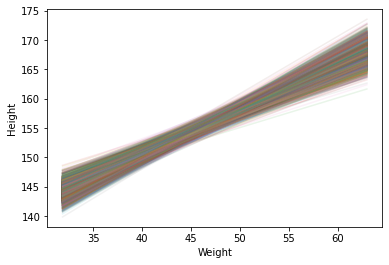

In [83]:
extended_domain = np.ones((1, 4000)) * weight_range
plt.plot(extended_domain, h, alpha=0.1)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [84]:
heights = df.loc[:, 'h[1]':f'h[{N}]'].values

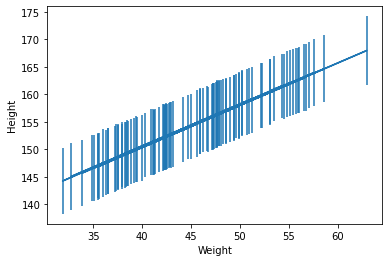

In [89]:
y = heights.mean(axis=0)
x = data_fit['weights']
yer = heights.std(axis=0)

plt.errorbar(x, y, yer)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

### Task 7. Extending the model

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


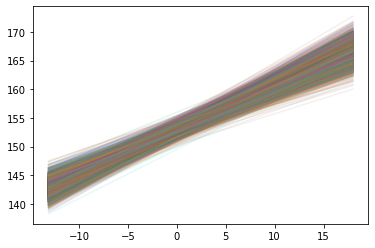

In [94]:
N = 50
data_fit = {'N': N, 'weights': d.c_weight.values[:N], 'heights': d.height.values[:N]}
fit=model_2_fit.sample(data=data_fit,seed=28052020)
df = fit.draws_pd()
alpha = df['alpha'].values
beta = df['betha'].values

weight_range = np.linspace(data_fit['weights'].min(), data_fit['weights'].max(), N).reshape((N, 1))
h = betha * weight_range + alpha
extended_domain = np.ones((1, 4000)) * weight_range
plt.plot(extended_domain, h, alpha=0.1)
plt.show()